# Введение в машинное обучение

## Предварительный анализ данных

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('./data/cs-training.csv', sep=',')

In [4]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Описание данных

* SeriousDlqin2yrs - Person experienced 90 days past due delinquency or worse 
* RevolvingUtilizationOfUnsecuredLines - Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
* age - Age of borrower in years
* NumberOfTime30-59DaysPastDueNotWorse - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
* DebtRatio - Monthly debt payments, alimony,living costs divided by monthy gross income
* MonthlyIncome - Monthly income
* NumberOfOpenCreditLinesAndLoans - Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
* NumberOfTimes90DaysLate - Number of times borrower has been 90 days or more past due.
* NumberRealEstateLoansOrLines - Number of mortgage and real estate loans including home equity lines of credit
* NumberOfTime60-89DaysPastDueNotWorse - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
* NumberOfDependents - Number of dependents in family excluding themselves (spouse, children etc.)

* SeriousDlqin2yrs - Флаг выхода на просрочку через 90 дней
* RevolvingUtilizationOfUnsecuredLines - Общий баланс по кредитным картам и личным кредитным линиям, за исключением недвижимости, и без задолженности по кредитам, таким как автокредиты, деленные на сумму кредитных лимитов
* age - Возраст заёмщика в годах
* NumberOfTime30-59DaysPastDueNotWorse - Сколько раз заемщик просрочил выплату не более, чем на 30-59 дней, за последние 2 года.
* DebtRatio - Ежемесячные платежи по долгам, алименты и прожиточные расходы, делённые на месячный валовый доход
* MonthlyIncome - Ежемесячный доход
* NumberOfOpenCreditLinesAndLoans - Количество открытых кредитов (например, автокредит или закладная, кредитные карты и т.д.)
* NumberOfTimes90DaysLate - Сколько раз заёмщик просрочил выплату на 90 дней и более.
* NumberRealEstateLoansOrLines - Количество ипотечных кредитов и кредитов на недвижимость
* NumberOfTime60-89DaysPastDueNotWorse - Сколько раз заёмщик просрочил выплату не более, чем на 60-89 дней, за последние 2 года.
* NumberOfDependents - Количество иждивенцев в семье, исключая самого заёмщика (супруга, дети и т.д.)

## 1) Смотрим размер набора данных

см. shape

In [5]:
df.shape

(150000, 11)

## 2) Выводим названия колонок

см. columns

In [6]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

## 3) Смотрим информацию по каждой колонке

см. info

In [7]:
df.info

<bound method DataFrame.info of         SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                      1                              0.766127   45   
2                      0                              0.957151   40   
3                      0                              0.658180   38   
4                      0                              0.233810   30   
5                      0                              0.907239   49   
6                      0                              0.213179   74   
7                      0                              0.305682   57   
8                      0                              0.754464   39   
9                      0                              0.116951   27   
10                     0                              0.189169   57   
11                     0                              0.644226   30   
12                     0                              0.018798   51   
13                     0                     

## 4) Выводим характеристики каждого признака

см. describe

In [8]:
df.describe

<bound method NDFrame.describe of         SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
1                      1                              0.766127   45   
2                      0                              0.957151   40   
3                      0                              0.658180   38   
4                      0                              0.233810   30   
5                      0                              0.907239   49   
6                      0                              0.213179   74   
7                      0                              0.305682   57   
8                      0                              0.754464   39   
9                      0                              0.116951   27   
10                     0                              0.189169   57   
11                     0                              0.644226   30   
12                     0                              0.018798   51   
13                     0                   

## 5) Выводим соотношение между 1 и 0 для SeriousDlqin2yrs

см. value_counts

In [9]:
df['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

## 6) Определим средний возраст

см. mean

In [10]:
np.mean(df['age'])

52.295206666666665

## 7) Создадим свобную табличку для SeriousDlqin2yrs по признакам:
* NumberOfTime30-59DaysPastDueNotWorse 
* NumberOfTime60-89DaysPastDueNotWorse
* NumberOfTimes90DaysLate

Соберём по mean

см. pivot_table

In [11]:
df.pivot_table(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'],'SeriousDlqin2yrs').mean()


NumberOfTime30-59DaysPastDueNotWorse    1.334300
NumberOfTime60-89DaysPastDueNotWorse    0.977357
NumberOfTimes90DaysLate                 1.113294
dtype: float64

## 8) Визуализируем распределение переменной age для SeriousDlqin2yrs

см. hist

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75de0e32e8>,
      dtype=object)

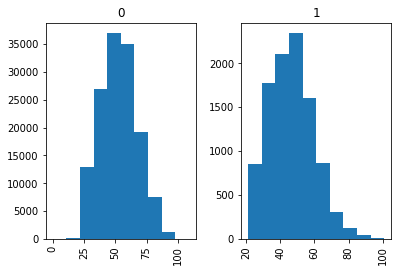

In [12]:
df['age'].hist(by=df['SeriousDlqin2yrs'])

## 9) Посмотрим на частоты признака NumberOfDependents

см. value_counts + normalize

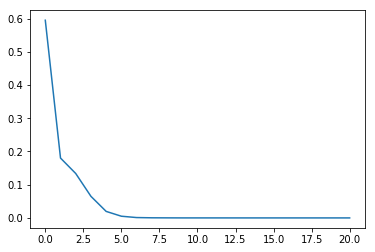

In [13]:
df['NumberOfDependents'].value_counts(normalize=True).plot()

## 10) Узнаем максимальное значение по каждому признаку

см. apply + max

In [14]:
df.apply(np.max, axis=0)

SeriousDlqin2yrs                              1.0
RevolvingUtilizationOfUnsecuredLines      50708.0
age                                         109.0
NumberOfTime30-59DaysPastDueNotWorse         98.0
DebtRatio                                329664.0
MonthlyIncome                           3008750.0
NumberOfOpenCreditLinesAndLoans              58.0
NumberOfTimes90DaysLate                      98.0
NumberRealEstateLoansOrLines                 54.0
NumberOfTime60-89DaysPastDueNotWorse         98.0
NumberOfDependents                           20.0
dtype: float64

## 11) Выведем ту часть таблицы, для которой значение признака age > 65

см. map + lambda

In [15]:
df[df.age > 65]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
15,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
17,0,0.061086,78,0,2058.000000,NaN,10,0,2,0,0.0
28,0,0.034421,69,0,0.042383,2500.0,17,0,0,0,1.0
38,0,1.000000,75,1,0.134078,3400.0,1,0,1,0,1.0
42,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0
45,0,0.368876,68,0,1687.500000,1.0,31,0,1,0,0.0
46,0,0.000603,70,0,0.177787,16800.0,12,0,1,0,2.0
50,0,0.000080,70,0,0.256340,6900.0,21,1,1,0,0.0
51,0,0.818978,73,0,3095.000000,0.0,9,0,1,1,0.0


## 12) Сгруппируем таблицу по SeriousDlqin2yrs и посмотрим статистику для признаков 'RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio'

см. groupby + describe(percentiles=[])

In [16]:
df.groupby('SeriousDlqin2yrs').describe(percentiles=[])


DebtRatio                                                    \
                     count        mean          std  min       50%       max   
SeriousDlqin2yrs                                                               
0                 139974.0  357.151168  2083.282060  0.0  0.362659  329664.0   
1                  10026.0  295.121066  1238.360283  0.0  0.428227   38793.0   

                 MonthlyIncome                                  ...    \
                         count         mean           std  min  ...     
SeriousDlqin2yrs                                                ...     
0                     111912.0  6747.837774  14813.502224  0.0  ...     
1                       8357.0  5630.826493   6171.719674  0.0  ...     

                 RevolvingUtilizationOfUnsecuredLines                          \
                                                  std  min       50%      max   
SeriousDlqin2yrs                                                                
0                                          256.126350  0.0  0.133288  50708.0   
1                                          131.835778  0.0  0.838853   8328.0   

                       age                                           
                     count       mean        std   min   50%    max  
SeriousDlqin2yrs                                                     
0                 139974.0  52.751375  14.791079   0.0  52.0  109.0  
1                  10026.0  45.926591  12.916289  21.0  45.0  101.0  

[2 rows x 60 columns]

## 13) Тоже самое, только для mean, std, min, max

см. groupby + agg + [np.mean, np.std, np.min, np.max]

In [17]:
df.groupby('SeriousDlqin2yrs').agg(['mean', 'std', 'min', 'max'])

RevolvingUtilizationOfUnsecuredLines                   \
                                                 mean         std  min   
SeriousDlqin2yrs                                                         
0                                            6.168855  256.126350  0.0   
1                                            4.367282  131.835778  0.0   

                                 age                      \
                      max       mean        std min  max   
SeriousDlqin2yrs                                           
0                 50708.0  52.751375  14.791079   0  109   
1                  8328.0  45.926591  12.916289  21  101   

                 NumberOfTime30-59DaysPastDueNotWorse             ...   \
                                                 mean        std  ...    
SeriousDlqin2yrs                                                  ...    
0                                            0.280109   2.946075  ...    
1                                            2.388490  11.734510  ...    

                 NumberRealEstateLoansOrLines      \
                                          min max   
SeriousDlqin2yrs                                    
0                                           0  54   
1                                           0  29   

                 NumberOfTime60-89DaysPastDueNotWorse                     \
                                                 mean        std min max   
SeriousDlqin2yrs                                                           
0                                            0.126666   2.900930   0  98   
1                                            1.828047  11.753068   0  98   

                 NumberOfDependents                       
                               mean       std  min   max  
SeriousDlqin2yrs                                          
0                          0.743417  1.105895  0.0  20.0  
1                          0.948208  1.219367  0.0   8.0  

[2 rows x 40 columns]

## 14) Построим crosstab для полей SeriousDlqin2yrs и age

см. crosstab

In [18]:
pd.crosstab(df.SeriousDlqin2yrs, df.age)

age,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,1,170,398,571,718,832,1046,1172,1355,1523,...,18,17,6,7,2,3,3,1,1,2
1,0,13,36,70,98,121,147,166,205,179,...,0,0,0,2,1,0,0,0,0,0


## 15) Построим crosstab для полей SeriousDlqin2yrs и age + нормализация

см. crosstab + normalize=True

In [19]:
pd.crosstab(df.SeriousDlqin2yrs, df.age, normalize = True)

age,0,21,22,23,24,25,26,27,28,29,...,96,97,98,99,101,102,103,105,107,109
SeriousDlqin2yrs,,,,,,,,,,,,,,,,,,,,,
0,0.000007,0.001133,0.002653,0.003807,0.004787,0.005547,0.006973,0.007813,0.009033,0.010153,...,0.00012,0.000113,0.00004,0.000047,0.000013,0.00002,0.00002,0.000007,0.000007,0.000013
1,0.000000,0.000087,0.000240,0.000467,0.000653,0.000807,0.000980,0.001107,0.001367,0.001193,...,0.00000,0.000000,0.00000,0.000013,0.000007,0.00000,0.00000,0.000000,0.000000,0.000000
